<img src="https://www.pucsp.br/sites/default/files/download/iniciacao-cientifica/brasao-pucsp-assinatura-alternativa-RGB.png" alt="Logo PUC" width="300">


| Nome |
|---|
| Ana Clara Rodrigues |
| Felipe Martins |
| João Gabriel Pereira |


# Objetivo:
 Definir uma estratégia de marketing a partir de um dataset de cartão de crédito utilizando análise fatorial ( PCA ) e a análises de cluster (K-mean e DBSCAN)




In [3]:
import pandas as pd

df = pd.read_csv('/content/CC GENERAL (1).csv', delimiter=';')

df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40900749,818182,954,0,954,0,166667,0,83333,0,0,2,1000.0,201802084,1.395098e+08,0,12
1,C10002,3202467416,909091,0,0,0,6442945483,0,0,0,25,4,0,7000.0,4103032597,1.072340e+09,222222,12
2,C10003,2495148862,1,77317,77317,0,0,1,1,0,0,0,12,7500.0,622066742,6.272848e+08,0,12
3,C10004,1666670542,636364,1499,1499,0,205788017,83333,83333,0,83333,1,1,7500.0,0,NaN,0,12
4,C10005,817714335,1,16,16,0,0,83333,83333,0,0,0,1,1200.0,678334763,2.447912e+08,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28493517,1,29112,0,29112,0,1,0,833333,0,0,6,1000.0,325594462,4.888636e+07,5,6
8946,C19187,19183215,1,300,0,300,0,1,0,833333,0,0,6,1000.0,275861322,NaN,0,6
8947,C19188,23398673,833333,1444,0,1444,0,833333,0,666667,0,0,5,1000.0,81270775,8.241837e+07,25,6
8948,C19189,13457564,833333,0,0,0,36558778,0,0,0,166667,2,0,500.0,52549959,5.575563e+07,25,6


## Análise e tratamento do dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   int64  
 2   BALANCE_FREQUENCY                 8950 non-null   int64  
 3   PURCHASES                         8950 non-null   int64  
 4   ONEOFF_PURCHASES                  8950 non-null   int64  
 5   INSTALLMENTS_PURCHASES            8950 non-null   int64  
 6   CASH_ADVANCE                      8950 non-null   int64  
 7   PURCHASES_FREQUENCY               8950 non-null   int64  
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   int64  
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   int64  
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   int64  
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [9]:
data = df.copy()
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

data.isnull().sum()


<ipython-input-9-9292483dcb4a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
<ipython-input-9-9292483dcb4a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [10]:
from sklearn.preprocessing import StandardScaler

numeric = data.drop(columns=['CUST_ID'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric)

data_scaled = pd.DataFrame(data_scaled, columns=numeric.columns)

data_scaled.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.729489,2.186841,-0.405528,-0.298403,-0.373322,-0.516294,-0.044990,-0.510662,-0.258281,-0.537900,-0.476070,-0.511333,-0.028709,-0.686539,-0.500623,-0.356593,0.36068
1,1.026164,2.490186,-0.410273,-0.298403,-0.385206,3.699709,-0.611609,-0.510662,-0.550450,-0.537755,0.110074,-0.591796,-0.028673,1.714190,0.450654,0.895921,0.36068
2,0.633382,-0.543257,-0.025712,0.197566,-0.385206,-0.516294,-0.611606,-0.510657,-0.550450,-0.537900,-0.476070,-0.109020,-0.028670,-0.427918,-0.003202,-0.356593,0.36068
3,0.173319,1.580153,-0.402817,-0.288787,-0.385206,-0.381635,-0.328301,-0.114239,-0.550450,-0.054055,-0.329534,-0.551565,-0.028670,-0.810724,-0.373640,-0.356593,0.36068
4,-0.298116,-0.543257,-0.410193,-0.298300,-0.385206,-0.516294,-0.328301,-0.114239,-0.550450,-0.537900,-0.476070,-0.551565,-0.028707,-0.393292,-0.393259,-0.356593,0.36068


# PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_

cumulative_variance = explained_variance.cumsum()
cumulative_variance



array([0.19294247, 0.36127952, 0.44944251, 0.5217341 , 0.58385186,
       0.64331325, 0.70068837, 0.74920334, 0.7942201 , 0.83476216,
       0.87383271, 0.90302161, 0.93060389, 0.95511252, 0.97618604,
       0.99565938, 1.        ])

Com a análise fatorial ( PCA) ao invés de 17 variáveis originais, usamos 5 componentes principais.



# K-MEANS

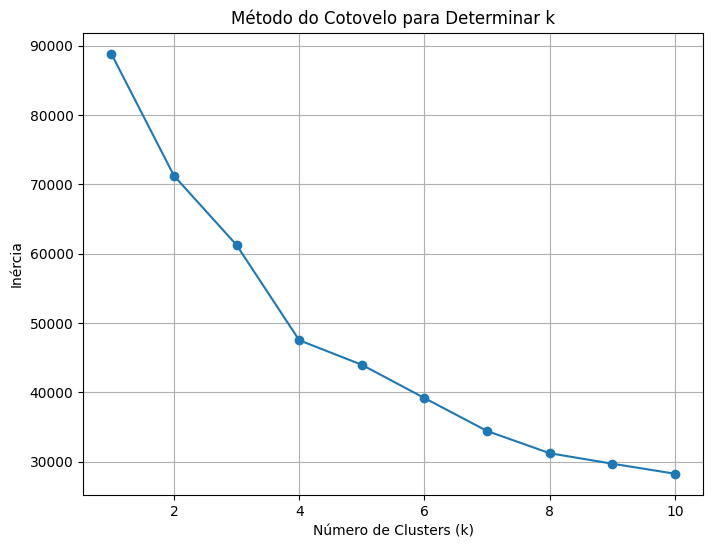

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reduzir os dados aos 5 principais componentes
pca_5 = PCA(n_components=5)
data_pca_5 = pca_5.fit_transform(data_scaled)

# Determinar o número ideal de clusters usando o método do cotovelo
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca_5)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar k')
plt.grid(True)
plt.show()


In [14]:
# Aplicar K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300, tol=1e-3)
clusters = kmeans.fit_predict(data_pca_5)

# Adicionar os clusters aos dados originais para análise
numeric['Cluster'] = clusters

# Agrupar por cluster e calcular estatísticas resumidas para interpretação
cluster_summary = numeric.groupby('Cluster').mean()
# Exibir o resumo corrigido dos clusters diretamente como texto
cluster_summary



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,8.313734e+08,151320.324935,35579.731654,17388.574285,15739.858228,3.932646e+08,52549.407319,41218.560688,50883.069786,55137.993601,1.627674,8.481704,7.176942e+06,8.366108e+08,4.186437e+08,49340.018396,11.466507
1,3.636471e+09,108129.251049,41905.362937,23026.560140,16469.060140,3.172863e+09,115055.614685,80940.968531,82785.920280,329418.567133,12.731469,8.397203,6.784825e+03,2.375425e+09,1.521132e+09,23184.574126,11.461538
2,2.548485e+09,39318.229958,641489.103376,401545.390295,219450.004219,3.835608e+08,115365.373418,301295.434599,173879.744726,38168.037975,1.710970,85.835443,8.783755e+03,3.796621e+09,1.224240e+09,123528.398734,11.964135
3,7.615985e+08,257764.493888,96004.034719,51891.184841,34465.986797,1.838116e+08,551636.371638,242575.555012,464491.621516,31417.933496,0.938875,17.868949,3.568488e+06,1.178853e+09,3.878527e+08,111386.061614,11.577017


## Cluster 0:
Clientes com saldo alto (BALANCE) e pagamentos (PAYMENTS), menor frequência de compras (PURCHASES_FREQUENCY).


## Cluster 1:
Clientes com alta frequência de adiantamentos em dinheiro (CASH_ADVANCE_FREQUENCY) e transações associadas a isso (CASH_ADVANCE_TRX), mas valores um pouco menor de crédito disponível (CREDIT_LIMIT)

## Cluster 2:
 Clientes com saldo baixo e compras muito altas (PURCHASES) e com alta frequência de compras únicas (ONEOFF_PURCHASES_FREQUENCY) e parceladas (PURCHASES_INSTALLMENTS_FREQUENCY).

## Cluster 3:
Clientes com saldo e frequência de compras altos.

# DBSCAN

In [17]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN com valores padrão iniciais para eps e min_samples
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca_5)

# Adicionar os clusters obtidos pelo DBSCAN ao conjunto de dados
data['DBSCAN_Cluster'] = dbscan_labels

# Verificar os clusters formados e contar os grupos
dbscan_cluster_counts = data['DBSCAN_Cluster'].value_counts()

dbscan_cluster_counts


,count
DBSCAN_Cluster,
0,8755
-1,186
2,5
1,4


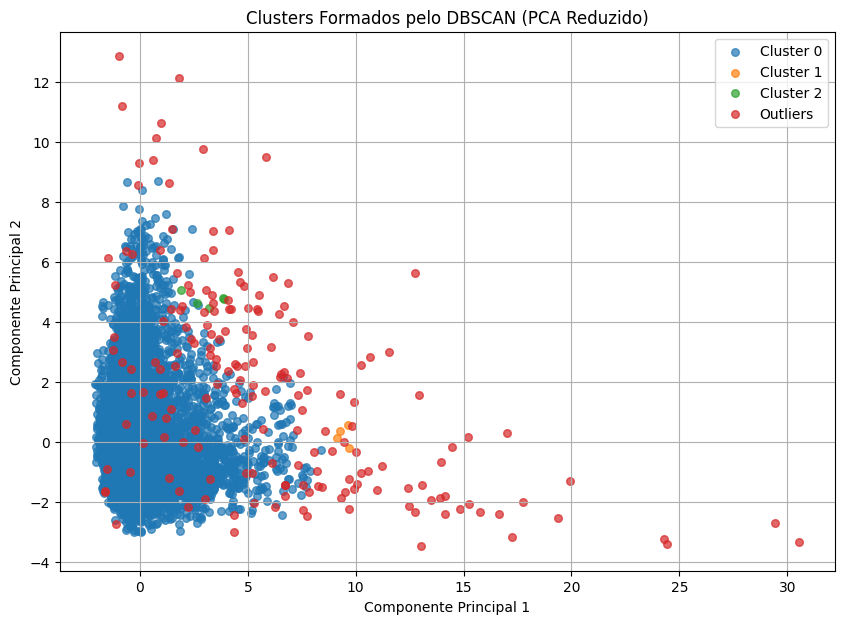

In [22]:
import matplotlib.pyplot as plt

pca_x = data_pca_5[:, 0]
pca_y = data_pca_5[:, 1]

unique_labels = set(dbscan_labels)
colors = plt.cm.tab10.colors

plt.figure(figsize=(10, 7))
for label in unique_labels:
    label_mask = dbscan_labels == label
    plt.scatter(
        pca_x[label_mask],
        pca_y[label_mask],
        label=f"Cluster {label}" if label != -1 else "Outliers",
        s=30,
        alpha=0.7,
    )

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters Formados pelo DBSCAN (PCA Reduzido)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


## Cluster 0:
O maior grupo de clientes. Esses são como os clientes mais parecidos.

##Cluster 1 e 2:
Pequenos grupos, perfis exclusivos.

##Outliers (-1):  
Clientes únicos, com comportamentos muito diferentes ou pouco frequentes.





1. K- means

O K-Means divide os dados em um número fixo de clusters, previamente especificado (neste caso, 4 clusters).

Simples e rápido mas não detecta outliers e depende da escolha inicial de k (número de clusters).

Resultados:
Dividiu os clientes em 4 grupos bem definidos.
Não considerou pontos fora do padrão (como outliers).

2. DBSCAN

Agrupa clientes com base na densidade (pontos densamente conectados formam clusters).

Detecta automaticamente outliers (pontos isolados).

Resultados:
Formou clusters menores e identificou  outliers.
Ideal para análises em que precisamos separar clientes com comportamentos fora do padrão.










|Algoritmo|	Número de Clusters|	Outliers Detectados|Força	|Fraqueza|
|---|---|---|---|---|
|K-Means|	4|	Nenhum	|Simples e rápido|	Não detecta outliers, depende de k|
|DBSCAN|	Varia (baseado na densidade)	|Vários|	Detecta outliers, formas arbitrárias|	Sensível aos parâmetros|